In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('book.csv',encoding='Latin1')


In [3]:
books = df.iloc[:,1:]
books

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


# EDA

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
books.groupby('Book.Title')['Book.Rating'].mean().sort_values(ascending=False).head()

Book.Title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
Name: Book.Rating, dtype: float64

In [6]:
df.groupby('Book.Title')['Book.Rating'].count().sort_values(ascending=False).head()

Book.Title
Fahrenheit 451                                   5
Ender's Game (Ender Wiggins Saga (Paperback))    4
Stardust                                         4
Vanished                                         4
Charlie and the Chocolate Factory                4
Name: Book.Rating, dtype: int64

In [7]:
ratings = pd.DataFrame(df.groupby('Book.Title')['Book.Rating'].mean())
ratings.head()

,Book.Rating
Book.Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


In [8]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('Book.Title')['Book.Rating'].count())
ratings.head()

,Book.Rating,num of ratings
Book.Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


<Axes: >

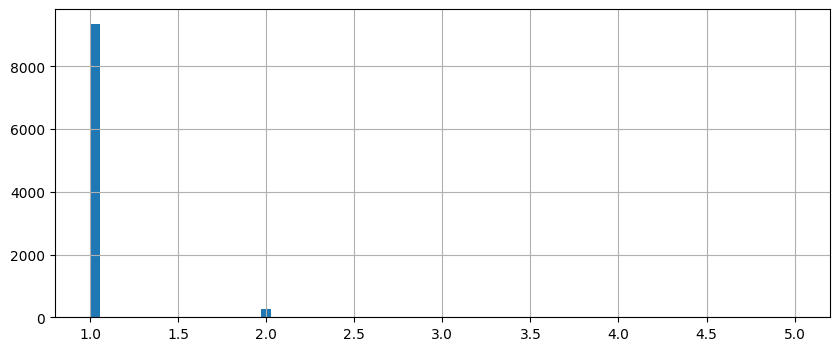

In [9]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<Axes: >

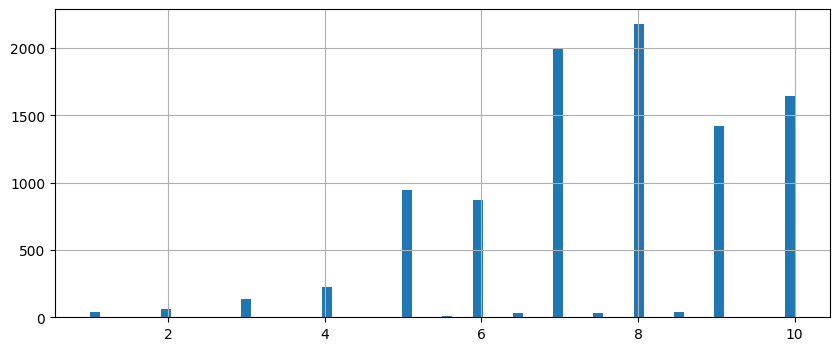

In [10]:
plt.figure(figsize=(10,4))
ratings['Book.Rating'].hist(bins=70)

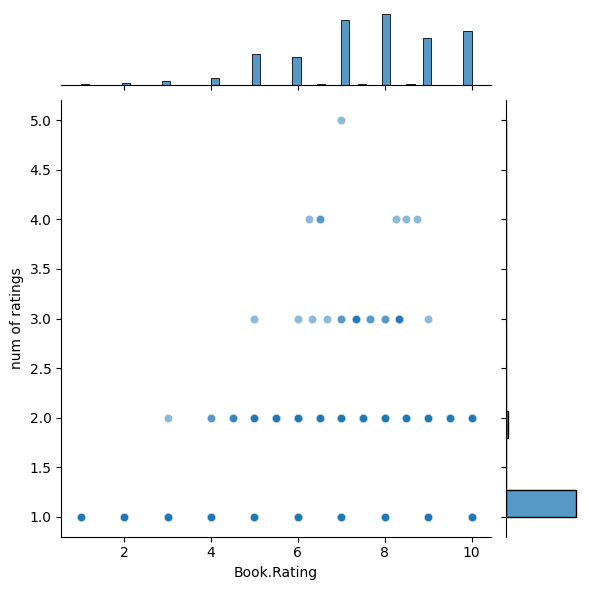

In [11]:
sns.jointplot(x='Book.Rating',y='num of ratings',data=ratings,alpha=0.5)

# Recommendation System

In [12]:
books2=books.pivot_table(index='User.ID',columns='Book.Title',values='Book.Rating').reset_index(drop=True)
books2

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
books2.index=books['User.ID'].unique()
books2

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
162121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
books2.fillna(0,inplace=True)
books2


Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,Book.Rating,num of ratings
Book.Title,,
Fahrenheit 451,7.000000,5
Ender's Game (Ender Wiggins Saga (Paperback)),6.250000,4
Stardust,8.500000,4
Vanished,6.500000,4
Charlie and the Chocolate Factory,6.500000,4
"The Subtle Knife (His Dark Materials, Book 2)",8.750000,4
"The Amber Spyglass (His Dark Materials, Book 3)",8.250000,4
"The Golden Compass (His Dark Materials, Book 1)",8.333333,3
Pet Sematary,7.666667,3


In [16]:
ratings.head()

,Book.Rating,num of ratings
Book.Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


In [17]:
# Lets Recommend Books for user1 & user2 

In [18]:
user1 = books2['Fahrenheit 451']
user2 = books2['Stardust']
user1.head()

276726    0.0
276729    0.0
276736    0.0
276737    0.0
276744    0.0
Name: Fahrenheit 451, dtype: float64

In [19]:
for_user1 = books2.corrwith(user1)
for_user2 = books2.corrwith(user2)

In [20]:
corr_user1 = pd.DataFrame(for_user1,columns=['Correlation'])
corr_user1.head()

,Correlation
Book.Title,
"Jason, Madison &amp",-0.000958
Other Stories;Merril;1985;McClelland &amp,-0.000958
Repairing PC Drives &amp,-0.000958
'48,-0.000958
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000958


In [21]:
corr_user2 = pd.DataFrame(for_user2,columns=['Correlation'])
corr_user2.head()

,Correlation
Book.Title,
"Jason, Madison &amp",-0.000913
Other Stories;Merril;1985;McClelland &amp,-0.000913
Repairing PC Drives &amp,-0.000913
'48,-0.000913
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000913


In [22]:
corr_user1.sort_values('Correlation',ascending=False).head(10)

,Correlation
Book.Title,
Fahrenheit 451,1.000000
The Day I Swapped My Dad for 2 Goldfish,0.596326
A la vora del pou (El BalancÃ­),0.596326
Les illes grogues: Tres novelÂ¨les romÃ ntiques (El BalancÃ­),0.596326
The Ambassador's Women,0.596326
"Dream Country (Sandman, Book 3)",0.596326
"For The Love Of Beau (Delta Justice) (Delta Justice , No 9)",0.596326
"Father Of Two (The Daddy School) (Harlequin Superromance, No 771)",0.596326
Silent Witness,0.596326


In [23]:
corr_user2.sort_values('Correlation',ascending=False).head(10)

,Correlation
Book.Title,
Stardust,1.000000
Eva Luna - Bolsillo,0.467784
Scooter and the Galactic Starship,0.467784
The Sixteenth Round: From Number 1 Contender To #45472,0.467784
Nueve Cuentos,0.467784
Dave Barry Slept Here,0.467784
"Lesser Evil (Star Trek Deep Space Nine: Mission Gamma, Book 4)",0.467784
Running with Scissors,0.467784
The Lion's Game,0.467784


In [24]:
corr_user1 = corr_user1.join(ratings['num of ratings'])
corr_user1.head()

,Correlation,num of ratings
Book.Title,,
"Jason, Madison &amp",-0.000958,1
Other Stories;Merril;1985;McClelland &amp,-0.000958,1
Repairing PC Drives &amp,-0.000958,1
'48,-0.000958,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000958,1


In [25]:
corr_user2 = corr_user2.join(ratings['num of ratings'])
corr_user2.head()

,Correlation,num of ratings
Book.Title,,
"Jason, Madison &amp",-0.000913,1
Other Stories;Merril;1985;McClelland &amp,-0.000913,1
Repairing PC Drives &amp,-0.000913,1
'48,-0.000913,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000913,1


In [26]:
# Books Recommended for user1

In [34]:
corr_user1[corr_user1['num of ratings']>2].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
Book.Title,,
Fahrenheit 451,1.000000,5
The Neverending Story,0.284962,3
The Hero and the Crown,0.238223,3
Vanished,0.224660,4
Ender's Game (Ender Wiggins Saga (Paperback)),0.161969,4


In [28]:
# Books Recommended for user2

In [36]:
corr_user2[corr_user2['num of ratings']>2].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
Book.Title,,
Stardust,1.000000,4
The Testament,0.319724,3
Mrs. Mike,-0.001359,3
The Wind in the Willows,-0.001453,3
The Street Lawyer,-0.001504,3
